In [37]:
# PART 1-CLUSTERING
from google.colab import files


uploaded = files.upload()

Saving Clustering+Clean+Ads_Data.xlsx to Clustering+Clean+Ads_Data (4).xlsx


**CLUSTERING -PART 1**

In [39]:
import pandas as pd

import numpy as np



# read the data




data = pd.read_excel('Clustering+Clean+Ads_Data (4).xlsx')


# perform basic analysis



data.head()

data.tail()

data.info()

data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23055 entries, 0 to 23054
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ad - Length            23055 non-null  int64  
 1   Ad- Width              23055 non-null  int64  
 2   Ad Size                23055 non-null  int64  
 3   Available_Impressions  23055 non-null  int64  
 4   Matched_Queries        23055 non-null  int64  
 5   Impressions            23055 non-null  int64  
 6   Clicks                 23055 non-null  int64  
 7   Spend                  23055 non-null  float64
 8   Fee                    23055 non-null  float64
 9   Revenue                23055 non-null  float64
 10  CTR                    18319 non-null  float64
 11  CPM                    18319 non-null  float64
 12  CPC                    18319 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 2.3 MB


,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
count,23055.000000,23055.000000,23055.000000,2.305500e+04,2.305500e+04,2.305500e+04,23055.000000,23055.000000,23055.000000,23055.000000,18319.000000,18319.000000,18319.000000
mean,385.147170,337.925830,96676.450228,2.431405e+06,1.294715e+06,1.241150e+06,10675.182216,2705.930508,0.335127,1923.717448,0.073676,7.673247,0.351097
std,233.658485,203.101164,61538.845640,4.741658e+06,2.512175e+06,2.428630e+06,17348.079671,4066.897355,0.031956,3104.349399,0.075169,6.482047,0.343382
min,120.000000,70.000000,33600.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000,0.210000,0.000000,0.000100,0.000000,0.000000
25%,120.000000,250.000000,72000.000000,3.362150e+04,1.827450e+04,7.991000e+03,710.000000,85.190000,0.330000,55.370250,0.002600,1.710000,0.090000
50%,300.000000,300.000000,72000.000000,4.836120e+05,2.580660e+05,2.252790e+05,4424.000000,1424.420000,0.350000,925.873000,0.082600,7.660000,0.160000
75%,720.000000,600.000000,84000.000000,2.527164e+06,1.179734e+06,1.112326e+06,12784.000000,3119.555000,0.350000,2090.101300,0.130000,12.520000,0.570000
max,728.000000,600.000000,216000.000000,2.759286e+07,1.470202e+07,1.419477e+07,143049.000000,26931.870000,0.350000,21276.180000,1.000000,81.560000,7.260000


In [40]:
# check for null values



data.isnull().sum()


Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [41]:
# check for duplicate values



data.duplicated().sum()


16

In [42]:
# treat missing values



def impute_missing(data, CTR, CPM, CPC):

    data[CTR] = data[CTR].fillna((data[CTR].mean()))

    data[CPM] = data[CPM].fillna((data[CPM].mean()))

    data[CPC] = data[CPC].fillna((data[CPC].mean()))



    return data


Ad - Length                 Axes(0.125,0.11;0.0503247x0.77)
Ad- Width                 Axes(0.18539,0.11;0.0503247x0.77)
Ad Size                  Axes(0.245779,0.11;0.0503247x0.77)
Available_Impressions    Axes(0.306169,0.11;0.0503247x0.77)
Matched_Queries          Axes(0.366558,0.11;0.0503247x0.77)
Impressions              Axes(0.426948,0.11;0.0503247x0.77)
Clicks                   Axes(0.487338,0.11;0.0503247x0.77)
Spend                    Axes(0.547727,0.11;0.0503247x0.77)
Fee                      Axes(0.608117,0.11;0.0503247x0.77)
Revenue                  Axes(0.668506,0.11;0.0503247x0.77)
CTR                      Axes(0.728896,0.11;0.0503247x0.77)
CPM                      Axes(0.789286,0.11;0.0503247x0.77)
CPC                      Axes(0.849675,0.11;0.0503247x0.77)
dtype: object

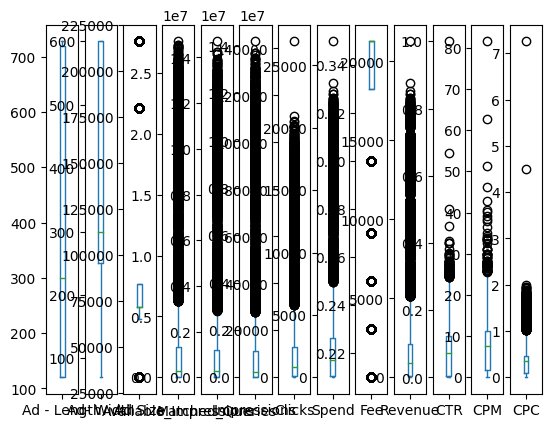

In [43]:
impute_missing(data, 'CPC', 'CTR', 'CPM')



# check for outliers



data.plot(kind='box', subplots=True, sharex=False, sharey=False)


:

In [44]:

# treat outliers



def treat_outliers(data, CTR, CPM, CPC):

    data[CTR] = data[CTR].clip(upper=data[CTR].quantile(0.95))

    data[CPM] = data[CPM].clip(upper=data[CPM].quantile(0.95))

    data[CPC] = data[CPC].clip(upper=data[CPC].quantile(0.95))



    data[CTR] = data[CTR].clip(lower=data[CTR].quantile(0.01))

    data[CPM] = data[CPM].clip(lower=data[CPM].quantile(0.01))

    data[CPC] = data[CPC].clip(lower=data[CPC].quantile(0.01))



    return data
treat_outliers(data, 'CPC', 'CTR', 'CPM')



,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300,250,75000,1780,285,285,1,0.00,0.35,0.0000,0.003500,0.940000,0.040000
1,300,250,75000,2727,356,355,1,0.00,0.35,0.0000,0.002800,0.940000,0.040000
2,300,250,75000,2430,497,495,1,0.00,0.35,0.0000,0.002000,0.940000,0.040000
3,300,250,75000,1218,242,242,1,0.00,0.35,0.0000,0.004100,0.940000,0.040000
4,300,250,75000,490,64,64,2,0.00,0.35,0.0000,0.031300,0.940000,0.040000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23050,720,300,216000,1,1,1,1,0.07,0.35,0.0455,0.073676,7.673247,0.351097
23051,720,300,216000,3,2,2,1,0.04,0.35,0.0260,0.073676,7.673247,0.351097
23052,720,300,216000,2,1,1,1,0.05,0.35,0.0325,0.073676,7.673247,0.351097
23053,120,600,72000,7,1,1,1,0.07,0.35,0.0455,0.073676,7.673247,0.351097


In [47]:
# z-score scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data_scaled = scaler.transform(data)




In [49]:
# clustering
from sklearn.cluster import KMeans
# elbow plot
wcss = []
for i in range(1,11):

    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)

    kmeans.fit(data_scaled)

    wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

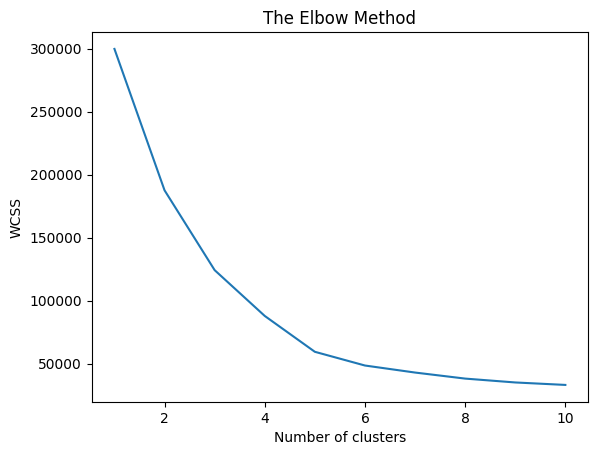

In [50]:
import matplotlib.pyplot as plt

plt.plot(range(1,11), wcss)

plt.title('The Elbow Method')

plt.xlabel('Number of clusters')

plt.ylabel('WCSS')

plt.show()

In [51]:
# silhouette score
from sklearn.metrics import silhouette_score

for n_cluster in range(2, 11):

    kmeans = KMeans(n_clusters=n_cluster).fit(data_scaled)

    label = kmeans.labels_

    sil_coeff = silhouette_score(data_scaled, label, metric='euclidean')

    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=2, The Silhouette Coefficient is 0.6039563399135933


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=3, The Silhouette Coefficient is 0.38085801290415966


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=4, The Silhouette Coefficient is 0.47004249239879864


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=5, The Silhouette Coefficient is 0.521775132754679


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=6, The Silhouette Coefficient is 0.4880274562323588


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=7, The Silhouette Coefficient is 0.4471740948026089


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=8, The Silhouette Coefficient is 0.4470679774561815


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=9, The Silhouette Coefficient is 0.458084159901846


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=10, The Silhouette Coefficient is 0.45466543673980997


In [52]:
# profile the ads based on optimum number of clusters
# k = 3
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(data_scaled)

data['cluster'] = kmeans.labels_

data.groupby('cluster').agg({'Clicks':'mean', 'Spend':'mean', 'Revenue':'mean', 'CPM':'mean', 'CTR':'mean', 'CPC':'mean'})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Clicks,Spend,Revenue,CPM,CTR,CPC
cluster,,,,,,
0,18720.824095,16274.104834,12489.604536,2.558957,0.012522,0.763429
1,14013.347292,1400.743013,967.589148,11.425043,0.116457,0.163864
2,4577.200544,2529.430495,1698.452146,2.623194,0.014123,0.519908


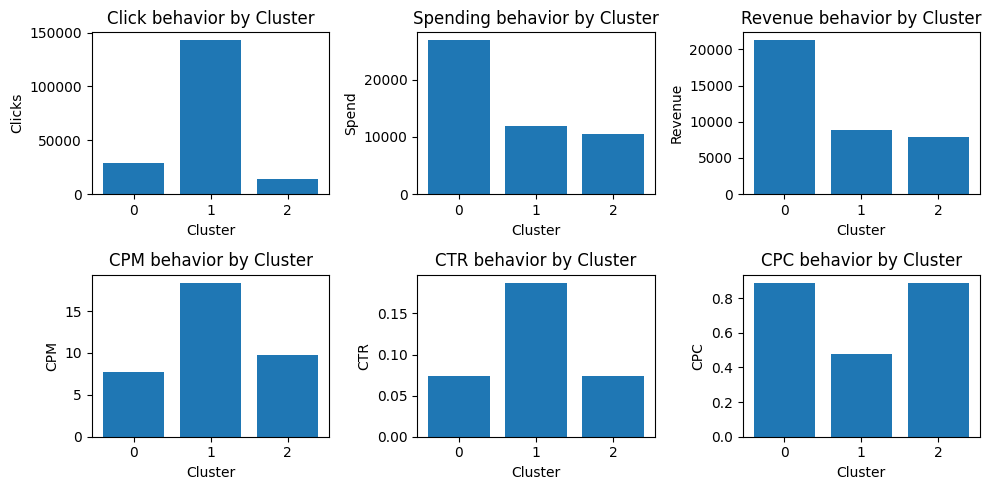

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.subplot(2,3,1)

plt.bar(data['cluster'], data['Clicks'])

plt.xlabel('Cluster')

plt.ylabel('Clicks')

plt.title('Click behavior by Cluster')


plt.subplot(2,3,2)

plt.bar(data['cluster'], data['Spend'])

plt.xlabel('Cluster')

plt.ylabel('Spend')

plt.title('Spending behavior by Cluster')


plt.subplot(2,3,3)

plt.bar(data['cluster'], data['Revenue'])

plt.xlabel('Cluster')

plt.ylabel('Revenue')

plt.title('Revenue behavior by Cluster')

plt.subplot(2,3,4)

plt.bar(data['cluster'], data['CPM'])

plt.xlabel('Cluster')

plt.ylabel('CPM')

plt.title('CPM behavior by Cluster')

plt.subplot(2,3,5)

plt.bar(data['cluster'], data['CTR'])

plt.xlabel('Cluster')

plt.ylabel('CTR')

plt.title('CTR behavior by Cluster')

plt.subplot(2,3,6)

plt.bar(data['cluster'], data['CPC'])

plt.xlabel('Cluster')

plt.ylabel('CPC')

plt.title('CPC behavior by Cluster')

plt.tight_layout()

plt.show()

In [54]:
# k = 4

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(data_scaled)
data['cluster'] = kmeans.labels_
data.groupby('cluster').agg({'Clicks':'mean', 'Spend':'mean', 'Revenue':'mean', 'CPM':'mean', 'CTR':'mean', 'CPC':'mean'})



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Clicks,Spend,Revenue,CPM,CTR,CPC
cluster,,,,,,
0,14245.217325,1511.518601,1068.572323,12.137863,0.120495,0.162209
1,18704.013284,16263.133683,12480.695953,2.557653,0.012506,0.763616
2,4525.398933,2491.503478,1672.657809,2.680345,0.014801,0.516316
3,14026.371583,1213.390443,790.249627,10.225303,0.110952,0.160756


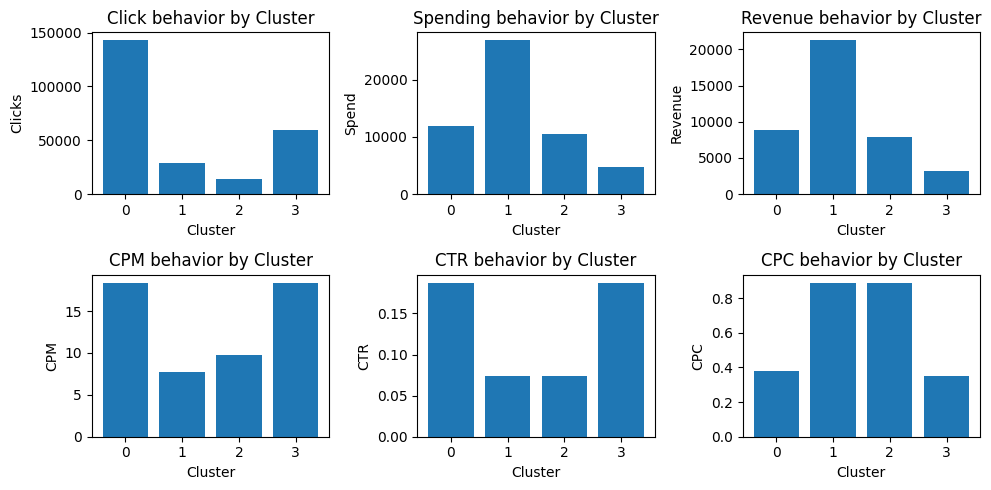

In [55]:
import matplotlib.pyplot as plt



plt.figure(figsize=(10,5))
plt.subplot(2,3,1)

plt.bar(data['cluster'], data['Clicks'])

plt.xlabel('Cluster')

plt.ylabel('Clicks')

plt.title('Click behavior by Cluster')



plt.subplot(2,3,2)

plt.bar(data['cluster'], data['Spend'])

plt.xlabel('Cluster')

plt.ylabel('Spend')

plt.title('Spending behavior by Cluster')



plt.subplot(2,3,3)

plt.bar(data['cluster'], data['Revenue'])

plt.xlabel('Cluster')

plt.ylabel('Revenue')

plt.title('Revenue behavior by Cluster')



plt.subplot(2,3,4)

plt.bar(data['cluster'], data['CPM'])

plt.xlabel('Cluster')

plt.ylabel('CPM')

plt.title('CPM behavior by Cluster')



plt.subplot(2,3,5)

plt.bar(data['cluster'], data['CTR'])

plt.xlabel('Cluster')

plt.ylabel('CTR')

plt.title('CTR behavior by Cluster')



plt.subplot(2,3,6)

plt.bar(data['cluster'], data['CPC'])

plt.xlabel('Cluster')

plt.ylabel('CPC')

plt.title('CPC behavior by Cluster')



plt.tight_layout()

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


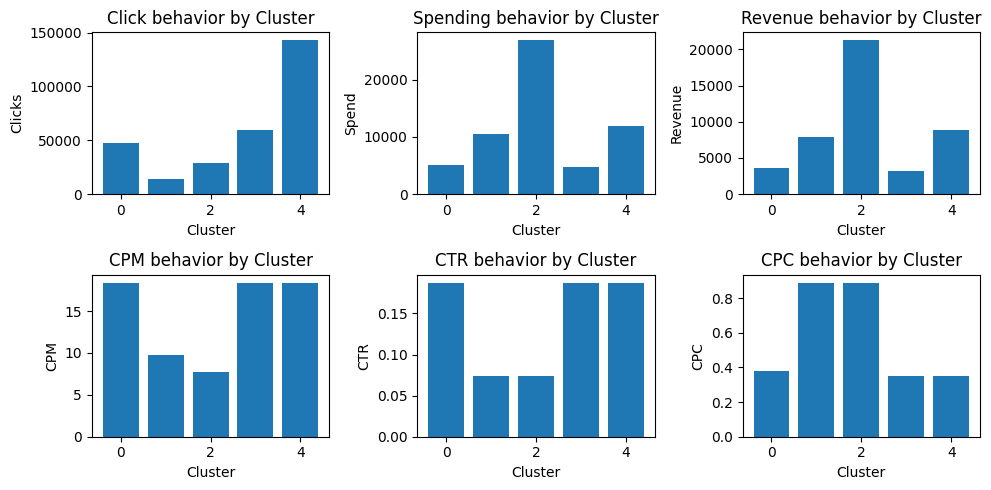

In [56]:
# k = 5



kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

kmeans.fit(data_scaled)



data['cluster'] = kmeans.labels_



data.groupby('cluster').agg({'Clicks':'mean', 'Spend':'mean', 'Revenue':'mean', 'CPM':'mean', 'CTR':'mean', 'CPC':'mean'})



import matplotlib.pyplot as plt



plt.figure(figsize=(10,5))



plt.subplot(2,3,1)

plt.bar(data['cluster'], data['Clicks'])

plt.xlabel('Cluster')

plt.ylabel('Clicks')

plt.title('Click behavior by Cluster')



plt.subplot(2,3,2)

plt.bar(data['cluster'], data['Spend'])

plt.xlabel('Cluster')

plt.ylabel('Spend')

plt.title('Spending behavior by Cluster')
plt.subplot(2,3,3)

plt.bar(data['cluster'], data['Revenue'])

plt.xlabel('Cluster')

plt.ylabel('Revenue')

plt.title('Revenue behavior by Cluster')



plt.subplot(2,3,4)

plt.bar(data['cluster'], data['CPM'])

plt.xlabel('Cluster')

plt.ylabel('CPM')

plt.title('CPM behavior by Cluster')



plt.subplot(2,3,5)

plt.bar(data['cluster'], data['CTR'])

plt.xlabel('Cluster')

plt.ylabel('CTR')

plt.title('CTR behavior by Cluster')



plt.subplot(2,3,6)

plt.bar(data['cluster'], data['CPC'])

plt.xlabel('Cluster')

plt.ylabel('CPC')

plt.title('CPC behavior by Cluster')



plt.tight_layout()

plt.show()

## **PART 2 -PCA**

In [58]:
from google.colab import files


uploaded = files.upload()

Saving PCA+India+Data_Census.xlsx to PCA+India+Data_Census.xlsx


In [59]:

#Part 2-PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
data1 = pd.read_excel('PCA+India+Data_Census.xlsx')
data1.head() # to view the first few rows of data
data1.info() # to get the summary of the data, including data types and non-null values
data1.describe() # to get the summary statistics of the numerical columns
data1.isnull().sum() # to check for missing values
data1.duplicated().sum() # to check for duplicate rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

0

In [62]:
# Which state has the highest gender ratio, and which has the lowest?
gender_ratio = data1.groupby('State').agg({'TOT_M': 'sum', 'TOT_F': 'sum'})
gender_ratio['gender_ratio'] = gender_ratio['TOT_M'] / gender_ratio['TOT_F']
gender_ratio.sort_values(by='gender_ratio', ascending=False)

,TOT_M,TOT_F,gender_ratio
State,,,
Lakshadweep,12823,14772,0.868061
Haryana,1167816,1498873,0.779129
NCT of Delhi,833414,1075266,0.775077
Uttar Pradesh,9043969,12023885,0.752167
Meghalaya,268036,356355,0.752160
Bihar,4025198,5405883,0.744596
Punjab,1579405,2121425,0.744502
Jammu & Kashmir,421213,572959,0.735154
Daman & Diu,13153,18706,0.703143


In [68]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#we can choose five variables out of the 24 variables given for EDA.
selected_variables = ['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06']
eda_data = data1[selected_variables]


#scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(eda_data)

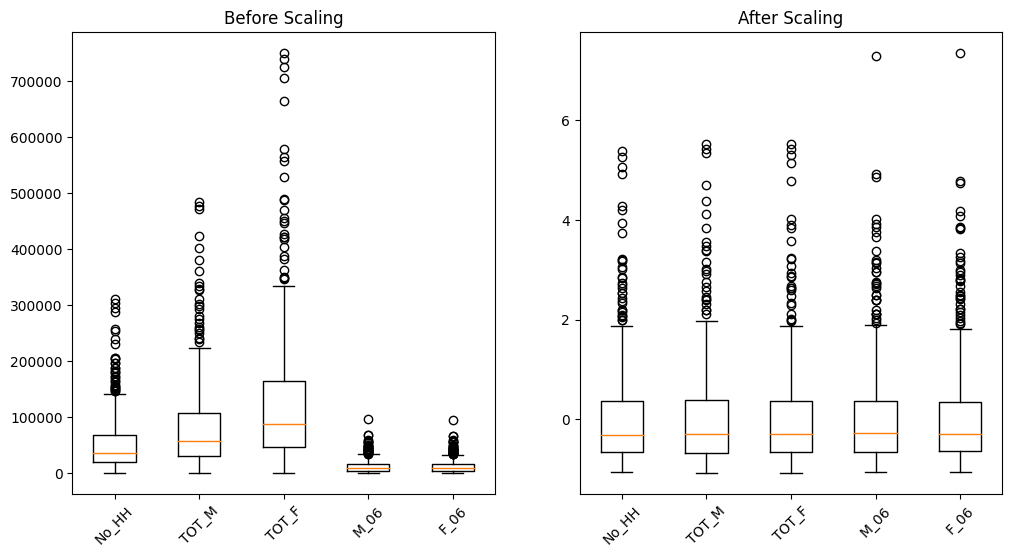

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].boxplot(eda_data.values)
axes[0].set_xticklabels(selected_variables, rotation=45)
axes[0].set_title('Before Scaling')

axes[1].boxplot(scaled_data)
axes[1].set_xticklabels(selected_variables, rotation=45)
axes[1].set_title('After Scaling')
plt.show()

In [71]:
from google.colab import files


uploaded = files.upload()

Saving PCA+India+Data_Census_Copy.xlsx to PCA+India+Data_Census_Copy.xlsx


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
data2 = pd.read_excel('PCA+India+Data_Census_Copy.xlsx')
data2.head() # to view the first few rows of data
data2.info() # to get the summary of the data, including data types and non-null values
data2.describe() # to get the summary statistics of the numerical columns
data2.isnull().sum() # to check for missing values
data2.duplicated().sum() # to check for duplicate rows

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#we can choose five variables out of the 24 variables given for EDA.
selected_variables = ['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06']
eda_data = data2[selected_variables]


#scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(eda_data)

pca = PCA()
pca.fit(scaled_data)
covariance_matrix = pca.get_covariance()
explained_variance = pca.explained_variance_ratio_

# Get eigenvalues and eigenvectors
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

# Get the principal components
pca_components = pca.transform(scaled_data)

# Scale data using z-score method
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data2)

# Perform PCA
pca = PCA(n_components=24)
pca.fit(data_scaled)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 59 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   State Code      640 non-null    int64
 1   Dist.Code       640 non-null    int64
 2   No_HH           640 non-null    int64
 3   TOT_M           640 non-null    int64
 4   TOT_F           640 non-null    int64
 5   M_06            640 non-null    int64
 6   F_06            640 non-null    int64
 7   M_SC            640 non-null    int64
 8   F_SC            640 non-null    int64
 9   M_ST            640 non-null    int64
 10  F_ST            640 non-null    int64
 11  M_LIT           640 non-null    int64
 12  F_LIT           640 non-null    int64
 13  M_ILL           640 non-null    int64
 14  F_ILL           640 non-null    int64
 15  TOT_WORK_M      640 non-null    int64
 16  TOT_WORK_F      640 non-null    int64
 17  MAINWORK_M      640 non-null    int64
 18  MAINWORK_F      640 non-null  

PCA(n_components=24)

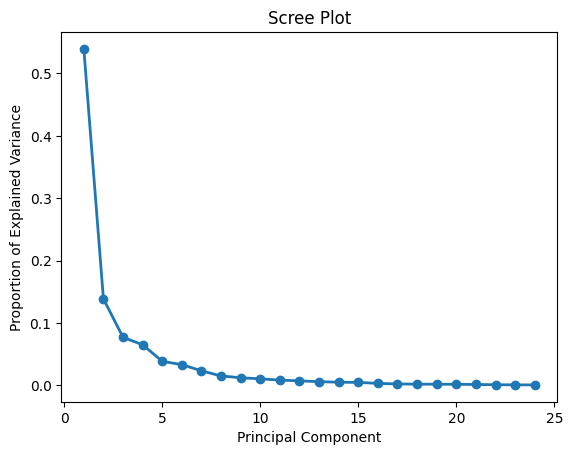

In [74]:
# Scree plot
plt.plot(np.arange(1, 25), pca.explained_variance_ratio_, 'o-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')
plt.show()

In [ ]:
# Loadings


loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create table of loadings
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'],
                              index=data.columns)

# Show table sorted by PC1 loadings
loading_matrix.sort_values('PC1', ascending=False)